## Load Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/mushrooms_pca.csv')
y = df['class']
X = df.drop(columns=['class']).values
X.view()

array([[ 0.24373845,  0.16963259,  0.18727096, ..., -0.2621439 ,
        -0.04811481,  0.10087257],
       [ 1.5713711 , -0.39656834,  0.45390158, ..., -0.11453773,
         0.41043087, -0.28486641],
       [ 0.01171017,  0.71284725, -0.7501287 , ...,  0.00313137,
        -0.25922659, -0.06733154],
       ...,
       [-0.89697748, -0.1697835 ,  0.3055329 , ...,  0.53583814,
         0.06813399, -0.06614521],
       [-1.88993255, -0.39236622, -0.58529202, ...,  0.1682014 ,
         0.37251319, -0.41726506],
       [ 0.66668421,  0.4509778 , -0.09989701, ..., -0.18299176,
        -0.0747118 , -0.36911983]])

## Random Search

In [16]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [100, 200, 300]
# Maximum number of levels in tree
max_depth = [10, 50, 100, None]
# Minimum number of samples required to split a node
min_samples_split = [2]
#
bootstrap = [True]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [10, 50, 100],
 'max_depth': [10, 50, 100, None],
 'min_samples_split': [2, 5, 10],
 'bootstrap': [True, False]}

In [18]:
# define a RF estimator
rf = RandomForestRegressor()

# set up randomized search with cross-validation
rf_random = GridSearchCV(estimator = rf, 
                               param_grid = random_grid, 
                               cv = 3, 
                               verbose=20, 
                               scoring='f1',
                               n_jobs = -1)

# fit on the data
rf_random.fit(X, y)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed: 14.4min
[Paralle

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [10, 50, 100], 'max_depth': [10, 50, 100, None], 'min_samples_split': [2, 5, 10], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=20)

In [20]:
print(rf_random.best_estimator_)
print(rf_random.best_score_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
-0.5008819909230441


In [22]:
import pickle
pickle.dump(rf_random, open( "../models/rf.p", "wb" ) )

In [31]:
results = pd.DataFrame(rf_random.cv_results_)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,4.238155,0.025809,0.006856,0.001266,True,10,2,10,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",-1.511833,0.011257,-0.381291,-0.627289,0.645671,30,0.822390,0.788701,0.816945,0.809346,0.014766
1,21.864062,0.231951,0.025156,0.000506,True,10,2,50,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",-1.500301,0.091336,-0.343133,-0.584032,0.671740,25,0.837719,0.813255,0.835612,0.828862,0.011070
2,46.632964,0.600436,0.053093,0.004833,True,10,2,100,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",-1.440547,0.095516,-0.299499,-0.548177,0.651282,20,0.844067,0.813343,0.837345,0.831585,0.013188
3,4.215128,0.071463,0.006074,0.000138,True,10,5,10,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",-1.575618,0.006728,-0.388229,-0.652373,0.672450,33,0.807935,0.783310,0.815739,0.802328,0.013820
4,23.410655,0.499505,0.024321,0.000076,True,10,5,50,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",-1.477141,0.076455,-0.301310,-0.567332,0.661559,23,0.837594,0.801407,0.832746,0.823916,0.016039
5,50.128244,0.459718,0.049617,0.001849,True,10,5,100,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",-1.438905,0.080359,-0.316688,-0.558412,0.643358,21,0.839550,0.810732,0.834650,0.828311,0.012590
6,5.319769,0.383493,0.006956,0.000348,True,10,10,10,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",-1.583280,0.032827,-0.461526,-0.670660,0.676143,36,0.792924,0.766572,0.783894,0.781130,0.010935
7,25.553442,0.246926,0.033029,0.010022,True,10,10,50,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",-1.451171,0.051995,-0.330995,-0.576724,0.637790,24,0.818030,0.791624,0.812732,0.807462,0.011406
8,52.849581,1.189832,0.057574,0.015730,True,10,10,100,"{'bootstrap': True, 'max_depth': 10, 'min_samp...",-1.429213,0.086151,-0.284900,-0.542654,0.644934,19,0.822355,0.795408,0.817870,0.811878,0.011789
9,8.876620,0.680488,0.015954,0.010883,True,50,2,10,"{'bootstrap': True, 'max_depth': 50, 'min_samp...",-1.656009,0.082842,-0.312051,-0.628406,0.744294,31,0.905738,0.907375,0.907556,0.906890,0.000818


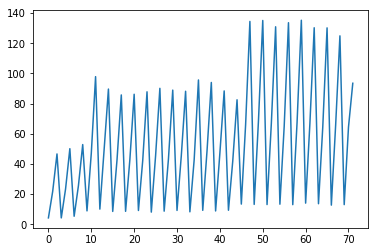

In [30]:
plt.plot(results['mean_fit_time'])

In [35]:
lines = []
for _,r in results.iterrows():
    line = r['params']
    line['time'] = r['mean_fit_time']
    line['score'] = r['mean_test_score']
    lines.append(line)
params_time = pd.DataFrame(lines)
params_time.head(40)

,bootstrap,max_depth,min_samples_split,n_estimators,score,time
0,True,10.0,2,10,-0.627289,4.238155
1,True,10.0,2,50,-0.584032,21.864062
2,True,10.0,2,100,-0.548177,46.632964
3,True,10.0,5,10,-0.652373,4.215128
4,True,10.0,5,50,-0.567332,23.410655
5,True,10.0,5,100,-0.558412,50.128244
6,True,10.0,10,10,-0.670660,5.319769
7,True,10.0,10,50,-0.576724,25.553442
8,True,10.0,10,100,-0.542654,52.849581
9,True,50.0,2,10,-0.628406,8.876620


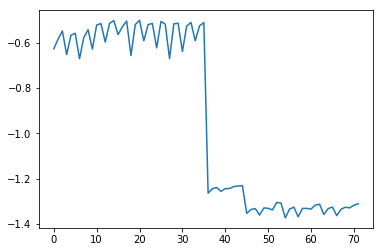

In [28]:
plt.plot(results['mean_test_score'])

In [39]:
btrue = params_time[params_time['bootstrap'] == True]
print(btrue.groupby(['max_depth'])['score'].mean())
print(btrue.groupby(['min_samples_split'])['score'].mean())
print(btrue.groupby(['n_estimators'])['score'].mean())

max_depth
10.0    -0.591961
50.0    -0.542059
100.0   -0.550178
Name: score, dtype: float64
min_samples_split
2    -0.567002
5    -0.557997
10   -0.555188
Name: score, dtype: float64
n_estimators
10    -0.625875
50    -0.534197
100   -0.520114
Name: score, dtype: float64
